***
# Homework 1

**Course:** MATH 616 - Data-Driven Dynamical Systems, Stochastic Modeling and Prediction

**Name:** Shrivats Sudhir

**NetID:** ssudhir2

**Email:** ssudhir2@wisc.edu

**Date:** September 9th, 2024
***

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1.

**Consider the linear damped-forced model:**
$$ \frac{du}{dt} = -au + f $$
**where $a > 0$ and $f$ are both constants.**

### (a.)

**Derive the analytic solution of $u$ with initial condition being $u(t=0) = u_0$.**

\begin{equation*}
    \begin{split}
        \frac{du}{dt}     &= -au + f\\
        dt                &= \frac{1}{-au + f} \; du\\
        \int dt           &= \int \frac{1}{-au + f} \; du\\
        t + C_1           &= -\frac{1}{a} \cdot \text{log}(-au + f) + C_2\\
        u                 &= -\frac{1}{a \cdot \text{exp}(a(C_1-C_2))} \cdot \text{exp}(-at) + \frac{f}{a}\\
    \end{split}
\end{equation*}

Therefore, the analytical solution of $u$ with initial condition $u(0) = u_0$ is:
$$ u = u_0 \cdot \text{exp}(-at) + \frac{f}{a} $$

In [42]:
def u_diff(a, f, u):
    
    """
    ODE function u' = (-au + f).

    --- inputs ---
    - a: constant
    - f: constant
    - u: variable  
    """
    
    return (-a*u) + f

def u(u0, a, f, t):
    
    """
    Analytical solution u of u'.

    --- inputs ---
    - u0: initial condition
    - a: constant
    - f: constant
    - t: variable  
    """
    
    return u0 * np.exp(-a*t) + f/a

def forward_euler(u0, t0, tend, h, a, f):
    
    """
    Implementing forward euler to estimate analytical solution u of u'.

    --- inputs ---
    - u0: initial condition
    - t0: initial time
    - tend: final time
    - h: time-step
    - a: constant (for function u_diff)
    - f: constant (for function u_diff)
    """
    
    t = [t0]
    y = [u(u0=u0, a=a, f=f, t=t0)]
    
    for i in range(int(tend/h)+1):
        t_curr = i*h
        y_curr = y[-1] + h * u_diff(a=a, f=f, u=y[-1])
        t.append(t_curr)
        y.append(y_curr)
    
    return np.asarray(y), np.asarray(t)

### (b.)

**Use the forward Euler method to numerically solve the equation. Here, use the initial condition $u_0=5$. The parameters are $a=0.5$ and $f=2$. Run the model starting from $t=0$ and ending at $t=2$.**

We know that the first-order ODE:
$$ u' = \frac{du}{dt} = -au + t $$

Which for a small enough $h$ can be approximated as:
\begin{equation*}
    \begin{split}
        u' &\approx \frac{u(t+h) - u(t)}{h}\\
        u(t+h) &\approx u' \cdot h + u(t)\\
    \end{split}
\end{equation*}

We can code the above and print an output table which shows the following columns:
* `t`: time (defined by time_step parameter $h$)
* `true_soln`: analytical solution when plugging in $t$ in $u(t)$
* `approx_soln`: forward euler approximation for $u(t)$ at time $t$
* `abs_diff`: absolute difference between true_soln and approx_soln

In [43]:
# Parameters
u0 = 5
a = 0.5
f = 2
t0 = 0
tend = 2
h = 0.1

(y_h, t_h) = forward_euler(u0=5, t0=0, tend=2, h=h, a=a, f=f)

true_y = []
for t in t_h:
    true_y.append( u(u0=u0, a=a, f=f, t=t) )
true_y = np.asarray(true_y)

# Plotting table
df = pd.DataFrame({'t': np.round(t_h, decimals=2), 
                   'true_soln': true_y, 
                   'approx_soln': y_h, 
                   'abs_diff': np.abs(true_y - y_h)})
df.style.background_gradient(cmap='viridis', subset=['true_soln', 'approx_soln', 'abs_diff'])

,t,true_soln,approx_soln,abs_diff
0,0.000000,9.000000,9.000000,0.000000
1,0.000000,9.000000,8.750000,0.250000
2,0.100000,8.756147,8.512500,0.243647
3,0.200000,8.524187,8.286875,0.237312
4,0.300000,8.303540,8.072531,0.231009
5,0.400000,8.093654,7.868905,0.224749
6,0.500000,7.894004,7.675459,0.218544
7,0.600000,7.704091,7.491686,0.212405
8,0.700000,7.523440,7.317102,0.206338
9,0.800000,7.351600,7.151247,0.200353


#### (i)

**Plot the numerical solution (using one choice of time step) and the analytic solution.**

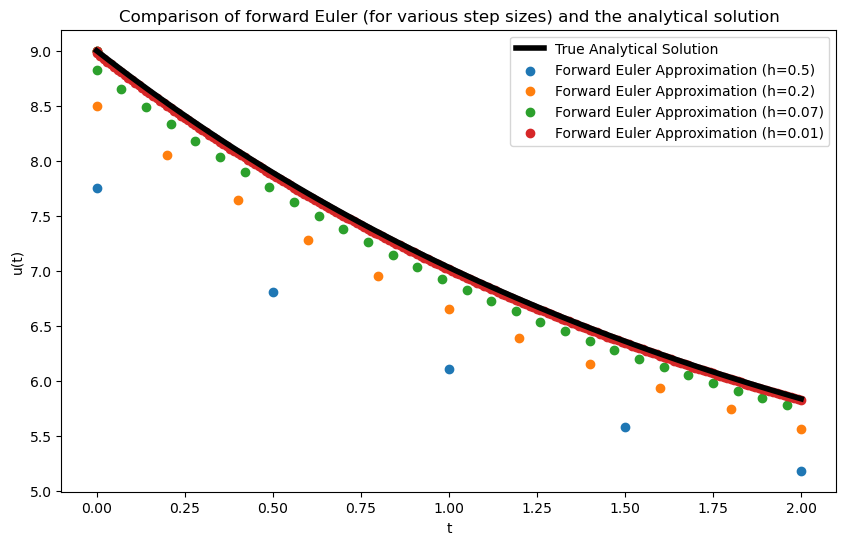

In [44]:
# Defining plot parameters
plt.figure(figsize=(10, 6))
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Comparison of forward Euler (for various step sizes) and the analytical solution')
plt.grid(False)

# Plotting analytical solution
true_y = []
true_t = np.linspace(0, 2, 100)
for t in true_t:
    true_y.append( u(u0=u0, a=a, f=f, t=t) )
plt.plot(true_t, true_y, linewidth=4, color='black', label='True Analytical Solution')


# Plotting forward euler approximation (for various step-sizes)
h1 = 0.5
h2 = 0.2
h3 = 0.07
h4 = 0.01
y_h1, t_h1 = forward_euler(u0=5, t0=0, tend=2, h=h1, a=a, f=f)
y_h2, t_h2 = forward_euler(u0=5, t0=0, tend=2, h=h2, a=a, f=f)
y_h3, t_h3 = forward_euler(u0=5, t0=0, tend=2, h=h3, a=a, f=f)
y_h4, t_h4 = forward_euler(u0=5, t0=0, tend=2, h=h4, a=a, f=f)

plt.scatter(t_h1, y_h1, label=f'Forward Euler Approximation (h={h1})')
plt.scatter(t_h2, y_h2, label=f'Forward Euler Approximation (h={h2})')
plt.scatter(t_h3, y_h3, label=f'Forward Euler Approximation (h={h3})')
plt.scatter(t_h4, y_h4, label=f'Forward Euler Approximation (h={h4})')

plt.legend()
plt.show()

#### (ii)

**Compute the error in the numerical solution (compared with the analytic solution) at $t=2$ using different numerical integration time steps $\Delta t = 10^{-5}, 5 \times 10^{-5}, 10^{-4}, 5 \times 10^{-4}, 10^{-3}$ and $5 \times 10^{-3}$. Plot a curve, where the x-axis is the time step and the y-axis is the absolute error. Use log scale for both x and y axes and write down the slope.**

**What did we learn here? The forward Euler method can be used to find a numerical solution to an ODE, and the numerical solution converges toward the true solution with a first-order rate of convergence (i.e., the error decreases as $\approx \Delta t$, not $\approx \Delta t^2$ or something else).**

## Question 2.

**Consider the model with a cubic nonlinearity:**

$$\frac{du}{dt} = au + bu^2 - cu^3 + f$$

**Let us fix two parameters $b = -4$ and $c = 4$. Then, depending on the choices of $a$ and $f$, the system will have distinct behavior. Numerically validate the solution behavior by using the forward Euler method and starting from different initial values:**

In [45]:
b = -4
c = 4

### (a.)

**When $a=4$ and $f=10$, the three roots of $au+bu^2-cu^3+f=0$ are $r_1 = 1.2868$ and $r_{2,3} = -1.1434 \pm 0.7971i$.**

In [46]:
a = 4
f = 10

r = np.array([ 1.2868, -1.1434 + 0.7971j, -1.1434 - 0.7971j ])

#### (i.)

**Plot $au+bu^2-cu^3+f$ as a function of $u$ for the given values of parameters $a,b,c,f$.**

(-5.0, 5.0)

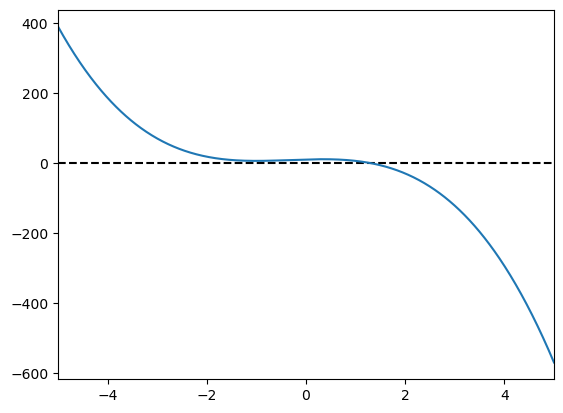

In [57]:
def u_diff(a, b, c, f, u):
    return (a*u + b*u**2 - c*u**3 + f)

u = np.linspace(-5, 5, 1000)
u_diff_output = []
for u_curr in u:
    u_diff_output.append(u_diff(a=a, b=b, c=c, f=f, u=u_curr))

x_low = -5
x_high = 5
plt.plot([x_low, x_high], [0,0], linestyle='--', color='black')
plt.plot(u, u_diff_output)
plt.xlim(x_low, x_high)

#### (ii.)

**Select different values of the initial condition $u_0$, and plot the numerical solutions in order to illustrate different solution behavior for different $u_0$.**

### (b.)

**When $a=4$ and $f=2$, the three roots of $au+bu^2-cu^3+f=0$ are
$r_1 = -1.4516$, $r_2 = 0.8546$ and $r_3 = -0.4030$.**

#### (i.) 

**Plot $au+bu^2-cu^3+f$ as a function of $u$ for the given values of parameters $a,b,c,f$.**

#### (ii.)

**Select different values of the initial condition $u_0$, and plot the numerical solutions in order to illustrate different solution behavior for different $u_0$.**

**What did we learn here? Nonlinear ODEs can potentially have multiple equilibria, or only one or zero equilibria, depending on the nonlinearity and the parameter values. Furthermore, the equilibrium points can be either stable or unstable.**

## Question 3.

**Consider the 2-dimensional linear model:**

$$ \frac{du_1}{dt} = -au_1 + \omega u_2 + f_1$$
$$ \frac{du_2}{dt} = -\omega u_1 - a u_2 + f_2$$

**Use the forward Euler method to numerically solve the equation and plot the trajectories of $(u_1, u_2)$ in the two-dimensional space. Discuss the difference in the following three situations: (a) $a = 0$, (b) $a = 1$, and (c) $a = −1$. You may fix other parameters $\omega = 1$ and $f_1 = f_2 = 0$.**

**What did we learn here? Phase portraits can be helpful for characterizing the different behaviors of dynamical systems.**

## Question 4.

**Consider a Gaussian random variable $\mathbf{x} = (x_1, x_2)^T$ with the mean $\mathbf{\mu}$ and the covariance matrix $\mathbf{\Sigma}$ being in the following form,**
$$ \mathbf{\mu} = \begin{pmatrix} \mathbf{\mu_1}\\ \mathbf{\mu_2} \end{pmatrix}, \quad \mathbf{\Sigma} = \begin{pmatrix} \mathbf{\Sigma_{11}} & \mathbf{\Sigma_{12}}\\ \mathbf{\Sigma_{21}} & \mathbf{\Sigma_{22}} \end{pmatrix} $$
**where $\mathbf{x}_1$ and $\mathbf{x}_2$ are multi-dimensional.** 

**Show that the conditional desntiy is then given by:**
$$ p(\mathbf{x}_1 | \mathbf{x}_2) \sim \mathcal{N}(\bar{\mathbf{\mu}}, \bar{\mathbf{\Sigma}}) $$
**where**
$$ \bar{\mathbf{\mu}} = \mathbf{\mu}_1 + \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}^{-1}}(\mathbf{x_2} - \mathbf{\mu_2}) \quad \text{and} \quad \bar{\mathbf{\Sigma}} = \mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}^{-1}}\mathbf{\Sigma_{21}} $$

**What did we learn here? For a multivariate Gaussian random variable, the conditional distribution is also Gaussian. Moreover, an analytical formula can be derived for the conditional mean and conditional covariance.**